<a href="https://colab.research.google.com/github/pritam17/MyProject1/blob/master/CNN_with_Tensorflow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0-rc1'

In [4]:
!pip install python-mnist

  Created wheel for python-mnist: filename=python_mnist-0.6-py2.py3-none-any.whl size=11662 sha256=49058a22298ac4a3888652403448ebe2078356be31bf77f19e279dbd731afd21
  Stored in directory: /root/.cache/pip/wheels/28/29/36/408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


In [0]:
from mnist import MNIST
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
#!wget 'https://www.dropbox.com/s/8smiyrivs3seqzn/mnist_data.zip' /mnist_data.zip
!unzip '/content/mnist_data.zip' -d'/content/' 

Archive:  /content/mnist_data.zip
   creating: /content/mnist_data/
  inflating: /content/mnist_data/t10k-images-idx3-ubyte  
  inflating: /content/mnist_data/t10k-labels-idx1-ubyte  
  inflating: /content/mnist_data/train-images-idx3-ubyte  
  inflating: /content/mnist_data/train-labels-idx1-ubyte  


In [0]:
mndata = MNIST('/content/mnist_data')
images_train, labels_train = mndata.load_training()
images_test,labels_test=mndata.load_testing()

In [12]:
np.shape(images_train)

(60000, 784)

In [0]:
labels_train=np.array(labels_train).reshape(-1,1)
labels_test=np.array(labels_test).reshape(-1,1)

In [0]:
onehot=OneHotEncoder()
onehot.fit(labels_train)
labels_train=onehot.transform(labels_train)
labels_test=onehot.transform(labels_test)

In [15]:
labels_train

<60000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 60000 stored elements in Compressed Sparse Row format>

In [0]:
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [17]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [0]:
images_train=np.array(images_train).reshape(60000,784)
images_test=np.array(images_test).reshape(10000,784)
images_train=images_train/255
images_test=images_test/255

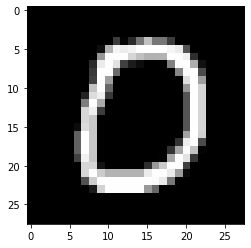

real label: 0


In [19]:
ind=10
sample_image = images_test[ind] 
sample_image = np.array(sample_image, dtype='float')
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('real label:',np.argmax(labels_test[ind]))

In [0]:
# def weight_variable(shape):
#     initial = tf.random.truncated_normal(shape,stddev=0.1,mean=0.0)
#     return tf.Variable(initial)

# def bias_variable(shape):
#     initial = tf.random.truncated_normal(shape,stddev=0.1,mean=0.0)
#     return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [0]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32]))
b_conv1 = tf.Variable(tf.random.truncated_normal([32]))


W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64]))
b_conv2 = tf.Variable(tf.random.truncated_normal([64]))


W_fc1 = tf.Variable(tf.random.truncated_normal([7*7*64, 1024]))
b_fc1 = tf.Variable(tf.random.truncated_normal([1024]))


keep_prob = tf.constant(0.0,'float32')


W_fc2 =tf.Variable(tf.random.truncated_normal([1024, 200]))
b_fc2 = tf.Variable(tf.random.truncated_normal([200]))


W_fc3 = tf.Variable(tf.random.truncated_normal([200, 10]))
b_fc3 = tf.Variable(tf.random.truncated_normal([10]))


In [0]:
def model(x,keep_prob):
    x_image=tf.cast(tf.reshape(x, [-1, 28, 28, 1]),'float32')
        
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
   
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    
    h_fc2= tf.nn.tanh(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
    h_fc2_drop=tf.nn.dropout(h_fc2,keep_prob)
    
    y_conv_logits=tf.matmul(h_fc2_drop, W_fc3) + b_fc3
    
    return y_conv_logits
    

In [0]:
def cross_entropy(y_true, y_pred):
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)

def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))


def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = model(x,keep_prob)
        loss_val = cross_entropy(y, y_pred)
    gradients=tape.gradient(loss_val, [W_conv1,b_conv1,W_conv2,b_conv2,W_fc1,b_fc1,W_fc2,b_fc2,W_fc3,b_fc3])
    return(gradients)

In [0]:
epochs=1000

In [0]:
learning_rate=0.01
for epoch in range(epochs):
    #rand_int=np.random.choice(range(60000),10)
    #x_train_batch=images_train[rand_int]
    #y_train_batch=labels_train[rand_int]
    for j in range(0,np.int(images_train.shape[0]/32),32):
      y_train_batch=labels_train[j:j+32]
      x_train_batch=images_train[j:j+32]
    
      dw_conv1,db_conv1,dw_conv2,db_conv2,dw_fc1,db_fc1,dw_fc2,db_fc2,dw_fc3,db_fc3=grad(x_train_batch,tf.cast(y_train_batch,'float32'))
    
      W_conv1.assign_sub(learning_rate*dw_conv1)
      W_conv2.assign_sub(learning_rate*dw_conv2)
      W_fc1.assign_sub(learning_rate*dw_fc1)
      W_fc2.assign_sub(learning_rate*dw_fc2)
      W_fc3.assign_sub(learning_rate*dw_fc3)
    
      b_conv1.assign_sub(learning_rate*db_conv1)
      b_conv2.assign_sub(learning_rate*db_conv2)
      b_fc1.assign_sub(learning_rate*db_fc1)
      b_fc2.assign_sub(learning_rate*db_fc2)
      b_fc3.assign_sub(learning_rate*db_fc3)
    
    if epoch%10==0:
    
        test_pred=model(images_test,tf.constant(0.0,'float32'))
        acc_test=accuracy(labels_test,test_pred).numpy()
        loss_test=cross_entropy(labels_test,test_pred).numpy()


        train_pred=model(images_train[:10000],tf.constant(0.0,'float32'))
        acc_train=accuracy(labels_train[:10000],train_pred).numpy()
        loss_train=cross_entropy(labels_train[:10000],train_pred).numpy()
        print('Test result:',acc_test,loss_test,' &&& Train result:',acc_train,loss_train)
    
#     if loss_train<3:
#         learning_rate=20

Test result: 0.359 1.7771517  &&& Train result: 0.3667 1.7402035
Test result: 0.3634 1.7559367  &&& Train result: 0.3716 1.7183566
Test result: 0.3732 1.7380774  &&& Train result: 0.3813 1.6999838
Test result: 0.3682 1.7228703  &&& Train result: 0.3868 1.6843168
Test result: 0.377 1.7098051  &&& Train result: 0.3943 1.6708057
Test result: 0.3799 1.6984977  &&& Train result: 0.3974 1.6590447
Test result: 0.382 1.6886504  &&& Train result: 0.3996 1.6487256
Test result: 0.3886 1.6800262  &&& Train result: 0.403 1.6396077
Test result: 0.391 1.6724321  &&& Train result: 0.4045 1.6314986
Test result: 0.3914 1.6657118  &&& Train result: 0.4049 1.6242446
Test result: 0.3971 1.6597344  &&& Train result: 0.4108 1.6177186
Test result: 0.3974 1.6543938  &&& Train result: 0.412 1.6118176
Test result: 0.3988 1.6496004  &&& Train result: 0.4128 1.6064566
Test result: 0.3991 1.6452817  &&& Train result: 0.4143 1.6015655
Test result: 0.3995 1.641375  &&& Train result: 0.4144 1.5970848
Test result: 0.39